# Project: No-show appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project seeks to analyse a dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

### Link to dataset

https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
#Defining a function for visualization of variables with highest counts

def var_count(df, var):
    plot = df[var].value_counts().nlargest().plot(kind='bar')

In [71]:
#Defining a function for replacing 1 or 0 with 'Yes' or 'No'
def replacement(var):
    df[var] = df[var].replace([1],'Yes')
    df[var] = df[var].replace([0],'No')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [72]:
# Reading through the data
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
df.shape

(110527, 14)

In [74]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Observation
> There are no missing values

In [76]:
#Dropping columns: 'patientId' and 'appointmentID' as they are personal to the patients

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Text(0, 0.5, 'Number of ptients')

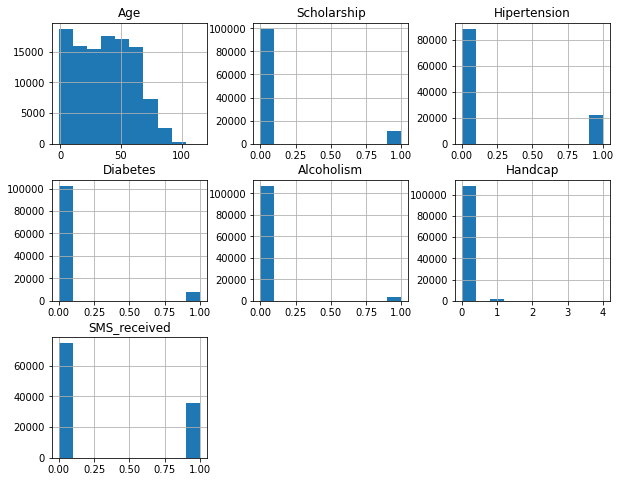

In [77]:
df.hist(figsize=(10,8));
plt.ylabel('Number of ptients')

In [78]:
#Checking for negative values

df[df.isna()].sum()

Gender              0
ScheduledDay        0
AppointmentDay      0
Age               0.0
Neighbourhood       0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show             0
dtype: object

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


#### Observation
> 1) There are no missing values
>
> 2) There are no negative values



### Data Cleaning 

##### There is need to rename the 'No-Show' column to 'NoShow' for ease of coding

In [80]:
#Renaming column for ease of coding
df.rename(columns = {'No-show':'NoShow'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### There is need to change the values in the 'NoShow'  column from 'Yes' or 'No' to 1 or 0 for ease of coding

In [81]:
#Changing the values in the NoShow column to 1 or 0

df['NoShow'] = df['NoShow'].replace(['Yes'],1)
df['NoShow'] = df['NoShow'].replace(['No'],0)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [82]:
#Changing the values in the 'SMS_received' column from 1 or 0 to 'Yes' or 'No'
replacement('SMS_received')


<a id='eda'></a>
## Exploratory Data Analysis



In [83]:
showed_up = df.NoShow == True
No_show = df.NoShow == False

### Question 1

#### Is there a relationship between sms recieved by patients and showing up for hospital appontments?

In [84]:
#To Check for number of patients who showed up after receiving an sms
df.SMS_received[showed_up].count()

22319

In [85]:
#To Check for average number of patients who did not show up after receiving an sms
df.SMS_received[No_show].count()

88208

Text(0.5, 1.0, 'No Show appointments of patients after recieving SMS')

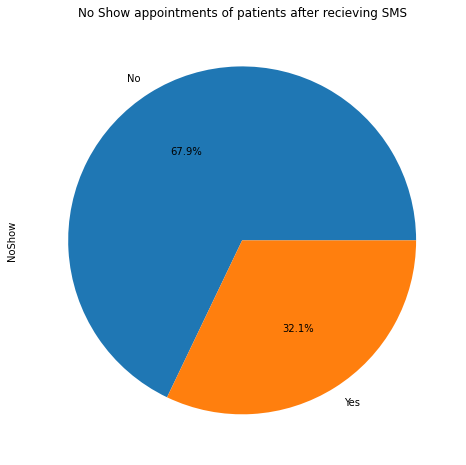

In [86]:
df.groupby('SMS_received').NoShow.count().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))
plt.title('No Show appointments of patients after recieving SMS')

#### Observation
> 67.9% of patients showed up for their appointments after receiving an sms. Hence the hospital should send more sms to people to encourage coming to the hospital for appointments

### Question 2

#### Which neighborhood has the highest number of No show appointments?

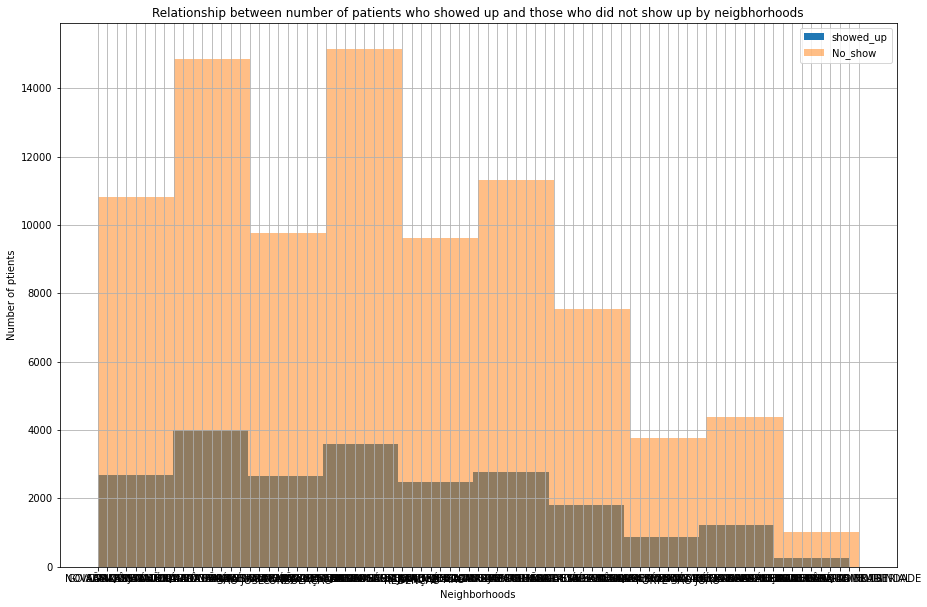

In [87]:
#Checking visual relationship between neighborhoods
df.Neighbourhood[showed_up].hist(figsize=(15,10), label = 'showed_up' )
df.Neighbourhood[No_show].hist(alpha = 0.5, label = 'No_show')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of ptients')
plt.title('Relationship between number of patients who showed up and those who did not show up by neigbhorhoods')
plt.legend();
plt.show()

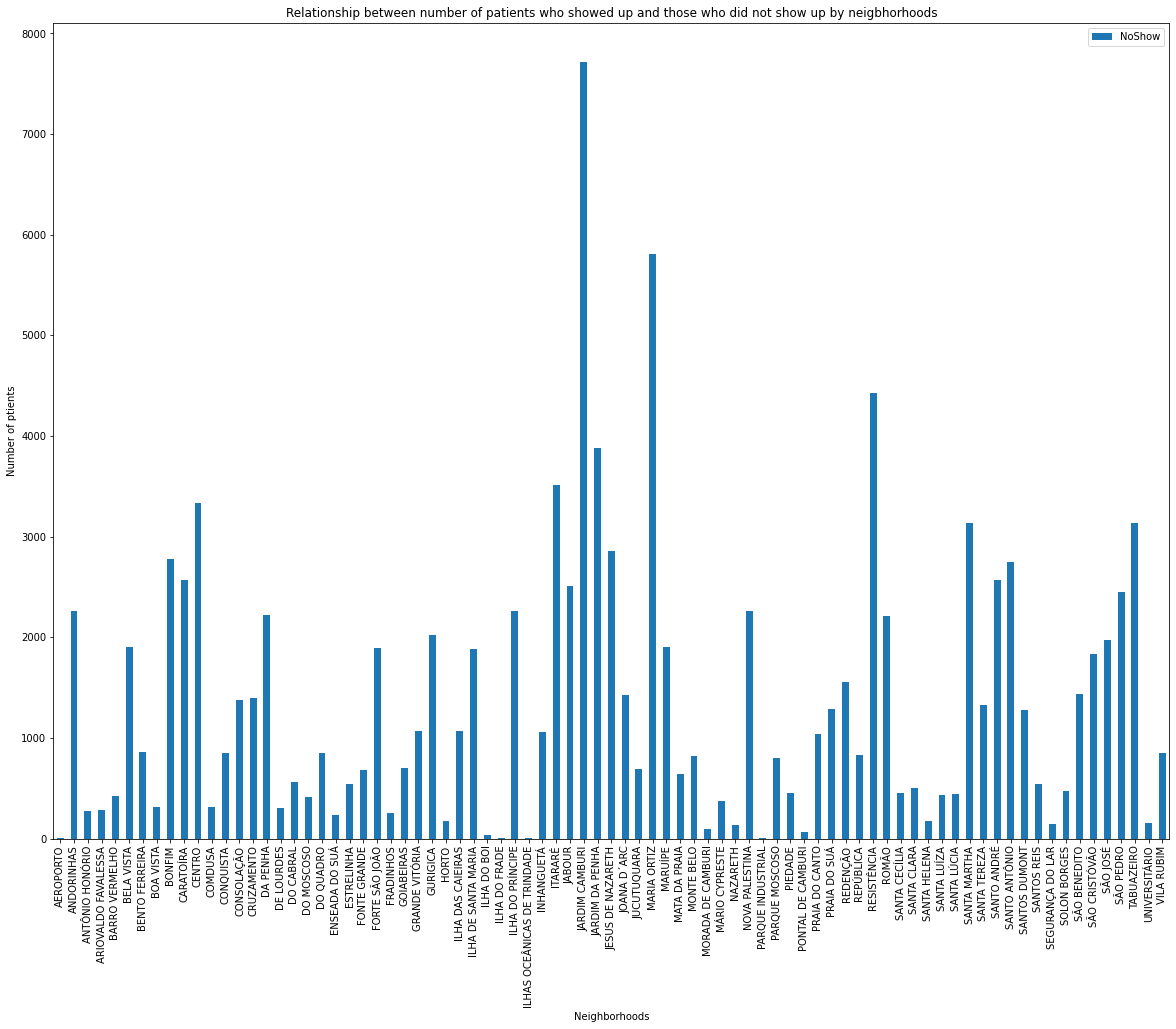

In [88]:
#Checking for the neighbourhood with the highest count of patients that did not show up for appointments
df.groupby('Neighbourhood').NoShow.count().plot(kind='bar', figsize=(20,15))

plt.xlabel('Neighborhoods')
plt.ylabel('Number of ptients')
plt.title('Relationship between number of patients who showed up and those who did not show up by neigbhorhoods')
plt.legend();
plt.show()



Text(0, 0.5, 'Number of Patients')

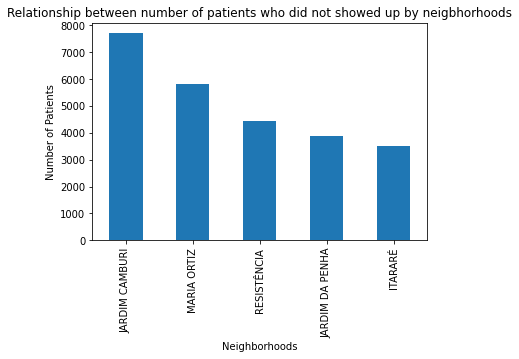

In [89]:
plt.title('Relationship between number of patients who did not showed up by neigbhorhoods')
var_count(df, 'Neighbourhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Patients')

#### Observation
> JARDIM CAMBURI is the neighborhood with the highest number of patients with no show

### Question 3

#### Which age group is more likely to show up for an hospital appointment?

Text(0.5, 1.0, 'Classification of No show appointments by Age')

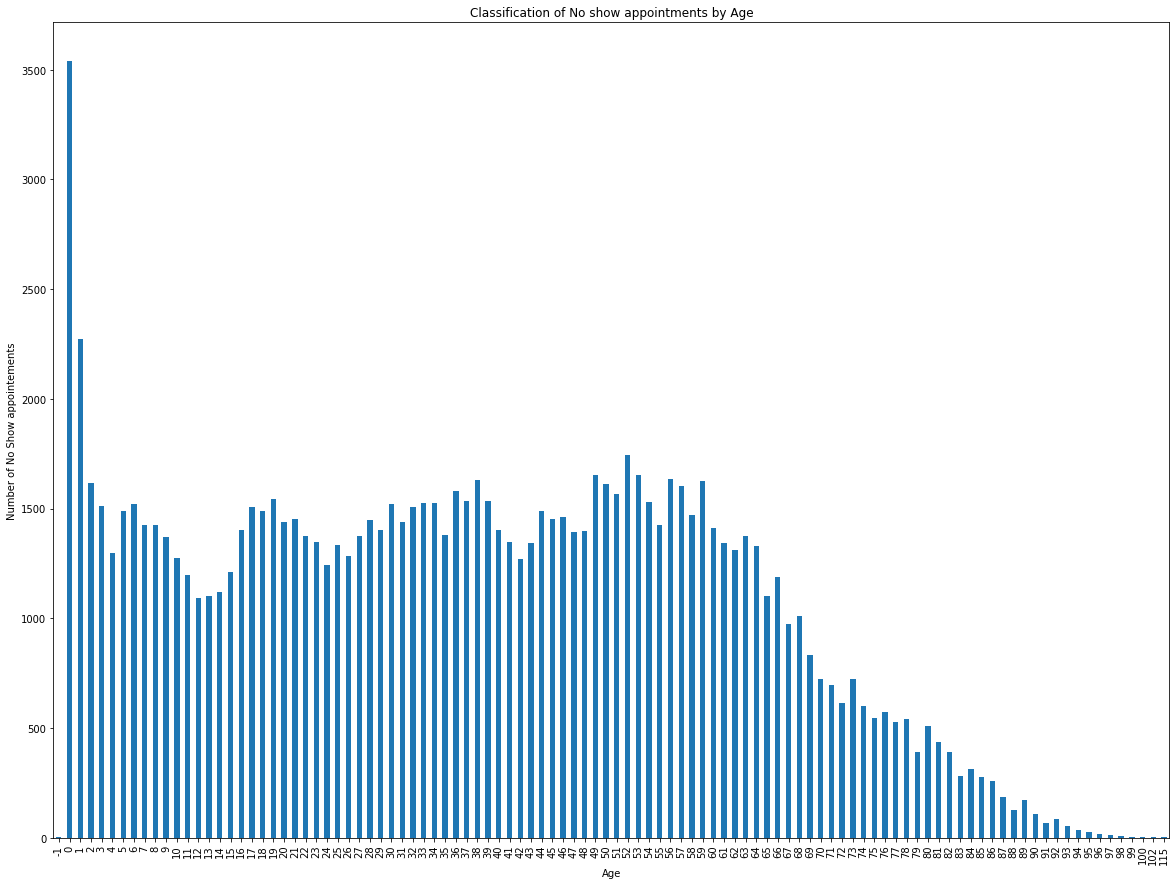

In [90]:
#Checking for the Age group with the highest count of patients that did not show up for appointments
df.groupby('Age').NoShow.count().plot(kind='bar', figsize=(20,15))
plt.xlabel('Age')
plt.ylabel('Number of No Show appointements')
plt.title('Classification of No show appointments by Age')

Text(0, 0.5, 'Number of Patients')

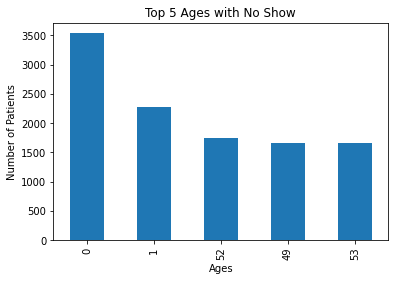

In [91]:
plt.title('Top 5 Ages with No Show')
var_count(df, 'Age')
plt.xlabel('Ages')
plt.ylabel('Number of Patients')

#### Observation
> The distribution is skewed to the right, showing that older people among the patients are least likely to miss their hospital appointments

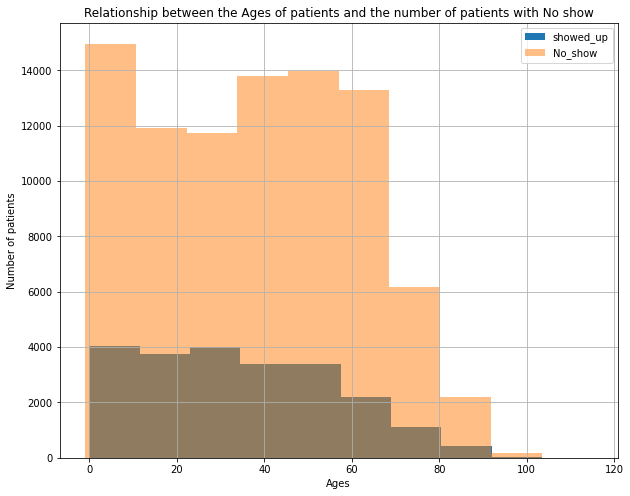

In [92]:
#Checking visual relationship between people who showed up for their appointment and their Ages
df.Age[showed_up].hist(figsize=(10,8), label = 'showed_up' )
df.Age[No_show].hist(alpha=0.5,label = 'No_show')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.title('Relationship between the Ages of patients and the number of patients with No show')
plt.legend();

#### Observation
> A higher percentage of young people with hospital appointments did not show up.

### Question 4

#### Which gender is more likely to show up for an hospital appointment?

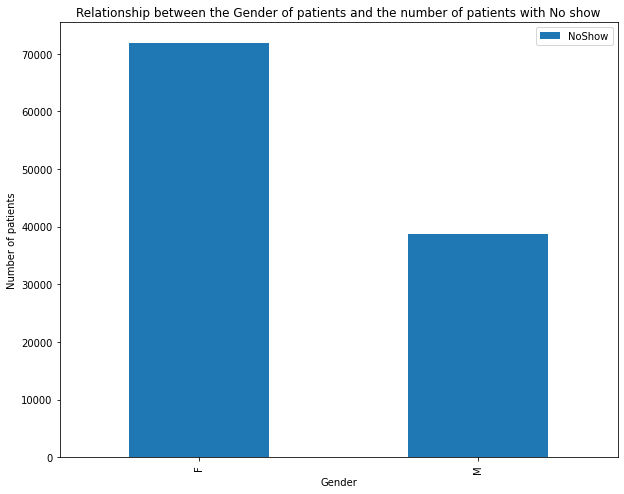

In [93]:
#Checking for the Gender with the highest count of patients that did not show up for appointments
df.groupby('Gender').NoShow.count().plot(kind='bar', figsize=(10,8))
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Relationship between the Gender of patients and the number of patients with No show')
plt.legend();

In [94]:
#Checking to see if there are more females than males

df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

#### Observation
> There are more female patients than male patients

In [95]:
#Changing the values in the 'Alcoholism' column from 1 or 0 to 'Yes' or 'No'
replacement('Alcoholism')

Text(0, 0.5, 'Number of Patients')

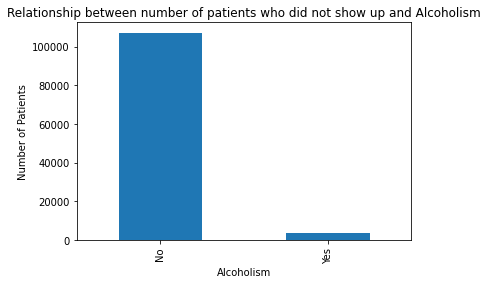

In [96]:
plt.title('Relationship between number of patients who did not show up and Alcoholism')
var_count(df, 'Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Number of Patients')

#### Observation
> Most patients with alcoholism did not show up for their medical appointments

In [97]:
#Changing the values in the 'Alcoholism' column from 1 or 0 to 'Yes' or 'No'
replacement('Diabetes')

Text(0, 0.5, 'Number of Patients')

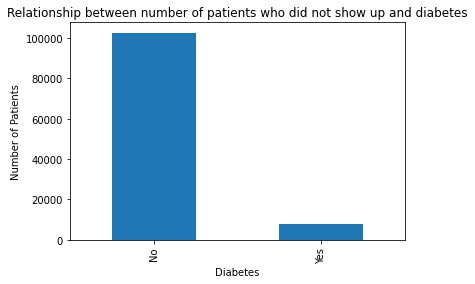

In [98]:
plt.title('Relationship between number of patients who did not show up and diabetes')
var_count(df, 'Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')

#### Observation
> Most people with diabetes did not show up for their medical appointmnets

<a id='conclusions'></a>
## Conclusions

> In conclusion, the factors which are responsible for predicting no show appointments at the hospital include whether or not the patients receive sms. The data also shows that old people are more likely to make an hospital appointment than young and middle aged people. 
>
> Furthermore, people with problems of alcoholism are more likely to miss an hospital appointment than people who do not have alcohol issues. 
>
> The neighborhood in which the patients are located is also a strong factor probably due to the proximity of such neighboorhoods to the hospital.

### Limitations

> One major limitation encountered in the data analysis process is the absence of data that shows the expected distance of travel for each patient from each neighborhood to the hospital so as to help in seeing whether distance to the hospital could be responsible for the etremely large number of 'No Show' that is recorded in some neigborhoods.
